The Infant Health Development Program (IHDP) dataset was collected to investigate the eect of high-quality childcare and home visits on the future cognitive test score of low-birth-weight, premature infants.                                               

#Section 1: Preprocessing data.                                                  
In this section we will be loading CSV file, followed by missing value imputation and removal of outliers

In [ ]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import seaborn as sns # for visualization
from sklearn.model_selection import GridSearchCV  # for hyperparameters tuning
from sklearn.model_selection import cross_val_score # for cross-validation evaluation
from sklearn.metrics import mean_squared_error # to calculate the RMSE
from joblib import dump # to save a model to disk

### Loading dataset

In [ ]:
data = pd.read_csv('ihdp_npci_repl532.csv')
#print(data)
#data.head()

In [ ]:
data.shape
#data.dtypes

In [ ]:
data.isna().sum()
# data.nunique()

### Remove outliers

In [ ]:
data.info

NameError: ignored

In [ ]:
data.describe()

In [ ]:
dt = data[['x1','x2','x3', 'x4', 'x5', 'x6']]
#dt.head()

In [ ]:
dt.hist()

####We can see extreme values for 'x2' and 'x3' variable. We will plot a box plots for all these variables to locate presence of outliers, if any.

In [ ]:
dt.boxplot(column=['x2'])

In [ ]:
#dt.boxplot(column=['x3'])

In [ ]:
#dt.boxplot(column=['x1'])

In [ ]:
dt.boxplot(column=['x4'])

In [ ]:
dt.boxplot(column=['x5'])

In [ ]:
dt.boxplot(column=['x6'])

#### The wiskers in the boxplot for variables x2, x4, x5 & x6, are present outliers.                                                                       The Inner Quertile Range (IQR) is the distance between the upper and lower quartiles.                                                                    We will use the 1.5 * IQR rule to remove outliers.

In [ ]:
# Function to compute the lower range and upper range of values to keep (1.5 x IQR)
def range_keep(column):
    sorted(column)
    Q1,Q3 = np.percentile(column , [25,75]) # 25th to 75th percentile (interquartile range)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [ ]:
# Compute the lower range and upper range for column 'x2'
lower_range, upper_range = range_keep(dt['x2'])
print(lower_range, upper_range)

# Keep only values that lie between that range
data = data.drop(data[(data['x2'] > upper_range) | (data['x2'] < lower_range)].index)

data.shape

In [ ]:
# Compute the lower range and upper range for column 'x5'
lower_range, upper_range = range_keep(data['x5'])
print(lower_range, upper_range)

# Keep only values that lie between that range
data = data.drop(data[(data['x5'] > upper_range) | (data['x5'] < lower_range)].index)

data.shape

In [ ]:
# Compute the lower range and upper range for column 'x4'
lower_range, upper_range = range_keep(data['x4'])
print(lower_range, upper_range)

# Keep only values that lie between that range
data = data.drop(data[(data['x4'] > upper_range) | (data['x4'] < lower_range)].index)

data.shape

In [ ]:
# Compute the lower range and upper range for column 'x6'
lower_range, upper_range = range_keep(data['x6'])
print(lower_range, upper_range)

# Keep only values that lie between that range
data = data.drop(data[(data['x6'] > upper_range) | (data['x6'] < lower_range)].index)

data.shape

In [ ]:
df = data[['x1','x2','x3', 'x4', 'x5', 'x6']]
df.head()

In [ ]:
df.hist()

#Section 2: Data Modeling :                                                   
 We are going to try and compare some popular supervise learning models. Since the outcome variable is contiuous, we will pick one of regression methods such as linear regressin, decision tree, random forest or gradient boosting methods.


####Prepare the input and target variables. Extract the target variable 'y'

In [ ]:
y = data['outcome']
y.head()

0    3.976909
1    6.455608
2    5.344970
3    7.024344
4    6.126817
Name: outcome, dtype: float64

#### Extract the input variable 'X'

In [ ]:
X = data.drop(columns={'outcome'})
X.head()
X.shape

(652, 26)

#### Split training and test tests into 70:30 ratio. 70 % of data will be used for training (and validation), 30 % for test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

## 2.1 Linear Regression

Scale features (for linear regression)                                        
Feature scaling :

Range from 0 to 1                                                               
'Fit' on training data only                                                     
'Transform' on training and test data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scaler for X
scaler_x = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Model evaluation by cross-validation
lin_reg_score = cross_val_score(lin_reg, X_train_scaled, y_train, verbose = 2)

# Average Coefficient of determination (R^2) on the validation set
print(f'R^2 Validation: {lin_reg_score.mean()}')

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
R^2 Validation: 0.7342644286951063


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [ ]:
# Fit the model to the training set
lin_reg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Compute predictions from the test set
y_pred = lin_reg.predict(X_test_scaled)

In [ ]:
# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {lin_reg.score(X_test_scaled, y_test)}')

R^2 Test: 0.7630613492042773


In [ ]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE Test: 1.1215994621040886


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


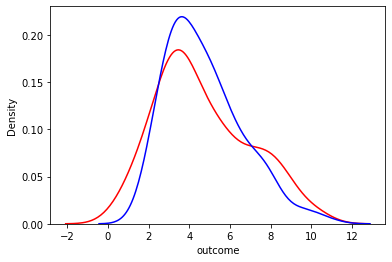

In [ ]:
# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Save the figure to a file
sns_plot.get_figure().savefig("lin_reg.png")

##2.2 Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
clf =DecisionTreeRegressor()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

In [ ]:
clf.score(X_test, y_test)

0.5756319784090138

In [ ]:
param_dict = {
    'criterion':['mse', 'gini', 'entropy'],
    'max_depth':[1,2,3,4,5,6,None]
}

In [ ]:
grid = GridSearchCV(clf, param_grid= param_dict, cv=10, n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, None]},
             pre_dispatch

In [ ]:
grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
grid.best_score_

0.672178368336801

## 2.3 Random Forest

In [ ]:
# Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
               'max_depth': np.arange(5, 41, 5), # Maximum number of levels in tree
               'min_samples_split': [5, 10, 20, 40], # Minimum number of samples required to split a node
               'min_samples_leaf': [2, 6, 12, 24], # Minimum number of samples required at each leaf node
               }

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomizedSearchCV on a RandomForestRegressor model with 100 iterations
rfor_reg = RandomizedSearchCV(RandomForestRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)

rfor_reg.fit(X_train, y_train)

In [ ]:
# Check the best parameters found by RandomizedSearchCV
rfor_reg.best_params_

In [ ]:
# Check the cross-validation evaluation metric of the best estimator
print(f'R^2 Validation: {rfor_reg.best_score_}')

In [ ]:
# Check the features which are considered as most important in making predictions
sorted(dict(zip(X_train.columns, rfor_reg.best_estimator_.feature_importances_)).items(), key=lambda x: x[1], reverse=True)

In [ ]:
# Compute predictions from the test set
y_pred = rfor_reg.predict(X_test)

In [ ]:
# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {rfor_reg.score(X_test, y_test)}')

In [ ]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

In [ ]:
# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Save the figure to a file
sns_plot.get_figure().savefig("rfor_reg.png")

In [ ]:
# Save the model to disk
dump(rfor_reg.best_estimator_, 'rfor_reg.pkl')

## 2.4 Gradient Boosting

In [ ]:
# Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {"learning_rate"   : [0.01, 0.1, 0.3],
             "subsample"        : [0.5, 1.0],
             'max_depth'        : np.arange(5, 41, 5),
             "max_features"     : ['auto', 'sqrt'],
             "min_samples_split": [5, 10, 20, 40],
             "min_samples_leaf" : [2, 6, 12, 24]
             }

NameError: ignored

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate a RandomizedSearchCV on a GradientBoostingRegressor model with 100 iterations
grad_reg = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)

grad_reg.fit(X_train, y_train)

In [ ]:
# Check the best parameters found by RandomizedSearchCV
grad_reg.best_params_

In [ ]:
# Check the cross-validation evaluation metric of the best estimator
print(f'R^2 Validation: {grad_reg.best_score_}')

In [ ]:
# Check the features which are considered as most important in making predictions
sorted(dict(zip(X_train.columns, grad_reg.best_estimator_.feature_importances_)).items(), key=lambda x: x[1], reverse=True)

In [ ]:
# Compute predictions from the test set
y_pred = grad_reg.predict(X_test)

In [ ]:
# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {grad_reg.score(X_test, y_test)}')

In [ ]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

In [ ]:
# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Save the figure to a file
sns_plot.get_figure().savefig("grad_reg.png")

In [ ]:
# Save the model to disk
dump(grad_reg.best_estimator_, 'grad_reg.pkl')

### 2.5: XGBoost

In [ ]:
# Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {"learning_rate"   : [0.01, 0.1, 0.3] ,
             'max_depth'        : np.arange(5, 41, 5),
             "min_child_weight" : [1, 3, 5, 7],
             "gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4],
             "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
             }

In [ ]:
from xgboost import XGBRegressor

# Instantiate a RandomizedSearchCV on an XGBRegressor model with 100 iterations
xgb_reg = RandomizedSearchCV(XGBRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)

xgb_reg.fit(X_train, y_train)

In [ ]:
# Best parameters
xgb_reg.best_params_

In [ ]:
# Check the cross-validation evaluation metric of the best estimator
print(f'R^2 Validation: {xgb_reg.best_score_}')

In [ ]:
# Check the number of times a feature was used to split the data across all trees
sorted(xgb_reg.best_estimator_.get_booster().get_score(importance_type='weight').items(), key=lambda x: x[1], reverse=True)

In [ ]:
# Plot the same data on a graph
from xgboost import plot_importance
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8, 7))
plot_importance(xgb_reg.best_estimator_, ax=ax)

In [ ]:
# Compute predictions from the test set
y_pred = xgb_reg.predict(X_test)

In [ ]:
# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {xgb_reg.score(X_test, y_test)}')

In [ ]:
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')

In [ ]:
# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Save the figure to a file
sns_plot.get_figure().savefig("xgb_reg.png")

In [ ]:
# Save the model to disk
dump(xgb_reg.best_estimator_, 'xgb_reg.pkl')